<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 20 Lab</h1>
</div>

# Part 1

For part one, we're going to be using the following code:

(reference week-19 for help with this)

In [2]:
# our sql script

import sqlite3
from contextlib import closing

db = 'week-20-lab.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")

a. Create a table called 'students' with the following columns:
* first_name (string)
* last_name (string)
* course (string)

In [52]:
db = 'week-20-lab.db'

execute(db, 'CREATE TABLE students\
            (id INTEGER PRIMARY KEY, \
             first_name VARCHAR(20) NOT NULL, \
             last_name VARCHAR(20) NOT NULL, \
             course VARCHAR(20) NOT NULL);',\
        commit=True)

In [53]:
get_tables(db)

['students']

In [54]:
get_cols(db, 'students')


[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'first_name', 'VARCHAR(20)', 1, None, 0),
 (2, 'last_name', 'VARCHAR(20)', 1, None, 0),
 (3, 'course', 'VARCHAR(20)', 1, None, 0)]

b. Add 30 students to your table. 15 of them taking the course 'progressive web' and 15 taking 'data science'. 

In [55]:
val = [
    ('Micah', 'Schaefer', 'Progressive Web'),
    ('Kaitlyn', 'Dennis', 'Data Science'),
    ('Tristin', 'Gibson', 'Progressive Web'),
    ('Danny', 'Holland', 'Data Science'),
    ('Madelyn', 'Marquez', 'Progressive Web'),
    ('Coleman', 'Berger', 'Data Science'),
    ('Cole', 'Frederick', 'Progressive Web'),
    ('Kendrick', 'Parsons', 'Data Science'),
    ('Rosemary', 'Rocha', 'Progressive Web'),
    ('Beatrice', 'Nelson', 'Data Science'),
    ('Max', 'York', 'Progressive Web'),
    ('Nathalie', 'Pitts', 'Data Science'),
    ('Taylor', 'Sutton', 'Progressive Web'),
    ('Camila', 'Macdonald', 'Data Science'),
    ('Carlie', 'Hickman', 'Progressive Web'),
    ('Alivia', 'Mcbride', 'Data Science'),
    ('Anabelle', 'Austin', 'Progressive Web'),
    ('Londyn', 'Jacobson', 'Data Science'),
    ('Reuben', 'Hicks', 'Progressive Web'),
    ('Devan', 'Everett', 'Data Science'),
    ('Devan', 'Everett', 'Progressive Web'),
    ('Tianna', 'Ellison', 'Data Science'),
    ('Kaylynn', 'Castillo', 'Progressive Web'),
    ('Nolan', 'Scott', 'Data Science'),
    ('Nolan', 'Scott', 'Progressive Web'),
    ('Tessa', 'Villanueva', 'Data Science'),
    ('Edgar', 'Riggs', 'Progressive Web'),
    ('Esther', 'Garrison', 'Data Science'),
    ('Kamron', 'Frye', 'Progressive Web'),
    ('Devin', 'Peters', 'Data Science'),
]

In [56]:
con = sqlite3.connect("week-20-lab.db")
con.executemany("INSERT INTO students(first_name, last_name, course) values (?,?,?)", val)

In [57]:
con.commit()

c. One of the students from the data science course got hired! Show the SQL command that will remove this student from the table and then remove them. 

In [58]:
execute(db, "DELETE FROM students WHERE id = 28;", \
       commit=True)

In [59]:
execute(db, "SELECT * FROM students;") 

[(1, 'Micah', 'Schaefer', 'Progressive Web'),
 (2, 'Kaitlyn', 'Dennis', 'Data Science'),
 (3, 'Tristin', 'Gibson', 'Progressive Web'),
 (4, 'Danny', 'Holland', 'Data Science'),
 (5, 'Madelyn', 'Marquez', 'Progressive Web'),
 (6, 'Coleman', 'Berger', 'Data Science'),
 (7, 'Cole', 'Frederick', 'Progressive Web'),
 (8, 'Kendrick', 'Parsons', 'Data Science'),
 (9, 'Rosemary', 'Rocha', 'Progressive Web'),
 (10, 'Beatrice', 'Nelson', 'Data Science'),
 (11, 'Max', 'York', 'Progressive Web'),
 (12, 'Nathalie', 'Pitts', 'Data Science'),
 (13, 'Taylor', 'Sutton', 'Progressive Web'),
 (14, 'Camila', 'Macdonald', 'Data Science'),
 (15, 'Carlie', 'Hickman', 'Progressive Web'),
 (16, 'Alivia', 'Mcbride', 'Data Science'),
 (17, 'Anabelle', 'Austin', 'Progressive Web'),
 (18, 'Londyn', 'Jacobson', 'Data Science'),
 (19, 'Reuben', 'Hicks', 'Progressive Web'),
 (20, 'Devan', 'Everett', 'Data Science'),
 (21, 'Devan', 'Everett', 'Progressive Web'),
 (22, 'Tianna', 'Ellison', 'Data Science'),
 (23, 'Kayly

d. Two students named Bill Gates and Elon Musk tested into phase 2 for progressive web. Write the SQL command that will add them to the table and then add them.

In [60]:
execute(db, "INSERT INTO students \
             VALUES(Null,'Bill','Gates', 'Progressive Web');", commit=True)

execute(db, "INSERT INTO students \
             VALUES(Null,'Elon','Musk', 'Progressive Web');", commit=True)

e. Elon Musk would like to go by a new name: 'XÆ Dogecoin-12'. Show the SQL command that would change his name and then run it. 

In [61]:
execute(db, "UPDATE students SET first_name='XÆ', last_name='Dogecoin-12' WHERE id =32 ;", commit=True)

In [62]:
execute(db, "SELECT * FROM students;") 

[(1, 'Micah', 'Schaefer', 'Progressive Web'),
 (2, 'Kaitlyn', 'Dennis', 'Data Science'),
 (3, 'Tristin', 'Gibson', 'Progressive Web'),
 (4, 'Danny', 'Holland', 'Data Science'),
 (5, 'Madelyn', 'Marquez', 'Progressive Web'),
 (6, 'Coleman', 'Berger', 'Data Science'),
 (7, 'Cole', 'Frederick', 'Progressive Web'),
 (8, 'Kendrick', 'Parsons', 'Data Science'),
 (9, 'Rosemary', 'Rocha', 'Progressive Web'),
 (10, 'Beatrice', 'Nelson', 'Data Science'),
 (11, 'Max', 'York', 'Progressive Web'),
 (12, 'Nathalie', 'Pitts', 'Data Science'),
 (13, 'Taylor', 'Sutton', 'Progressive Web'),
 (14, 'Camila', 'Macdonald', 'Data Science'),
 (15, 'Carlie', 'Hickman', 'Progressive Web'),
 (16, 'Alivia', 'Mcbride', 'Data Science'),
 (17, 'Anabelle', 'Austin', 'Progressive Web'),
 (18, 'Londyn', 'Jacobson', 'Data Science'),
 (19, 'Reuben', 'Hicks', 'Progressive Web'),
 (20, 'Devan', 'Everett', 'Data Science'),
 (21, 'Devan', 'Everett', 'Progressive Web'),
 (22, 'Tianna', 'Ellison', 'Data Science'),
 (23, 'Kayly

f. Show the command that would allow us to see only the students who are part of the course `data science`.

In [64]:
execute(db, "SELECT * from students where course='Data Science';")

[(2, 'Kaitlyn', 'Dennis', 'Data Science'),
 (4, 'Danny', 'Holland', 'Data Science'),
 (6, 'Coleman', 'Berger', 'Data Science'),
 (8, 'Kendrick', 'Parsons', 'Data Science'),
 (10, 'Beatrice', 'Nelson', 'Data Science'),
 (12, 'Nathalie', 'Pitts', 'Data Science'),
 (14, 'Camila', 'Macdonald', 'Data Science'),
 (16, 'Alivia', 'Mcbride', 'Data Science'),
 (18, 'Londyn', 'Jacobson', 'Data Science'),
 (20, 'Devan', 'Everett', 'Data Science'),
 (22, 'Tianna', 'Ellison', 'Data Science'),
 (24, 'Nolan', 'Scott', 'Data Science'),
 (26, 'Tessa', 'Villanueva', 'Data Science'),
 (30, 'Devin', 'Peters', 'Data Science')]

# Part 2

The following section uses the `unknown.csv` dataset located in `../datasets/`

a. Import and analyze the dataset. Make sure you do the following:

* read the csv file in as a `df`.

In [65]:
import pandas as pd

df = pd.read_csv('../datasets/unknown.csv')
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


* output the top of the `df`.

In [66]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


* output the columns.

In [69]:
df.columns

Index(['x', 'y'], dtype='object')

* show the shape of the `df`

In [70]:
df.shape

(300, 2)

* show the info.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


* check if we're missing any data and handle it.

In [74]:
df[df.isnull().any(axis=1)]

,x,y


* chart the data so we can visualize any relationships

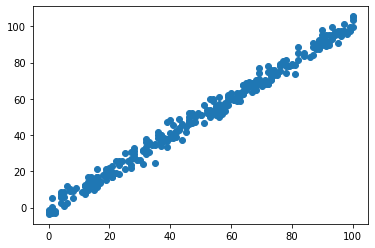

In [77]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df["x"], df['y'])

* show the covariance and correlation matrixes (including heatmap if you'd like).

<Figure size 720x720 with 0 Axes>

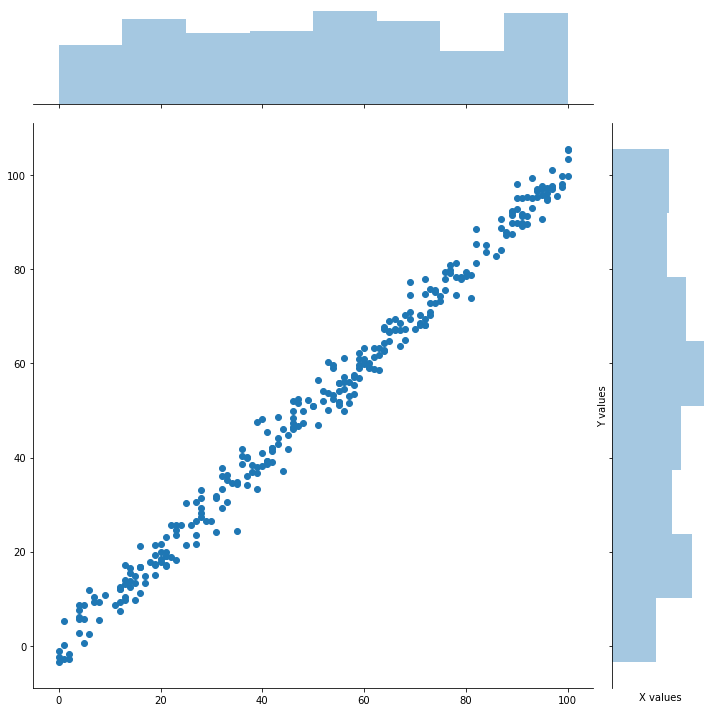

In [79]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df["x"].values, y=df["y"].values, height=10)
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

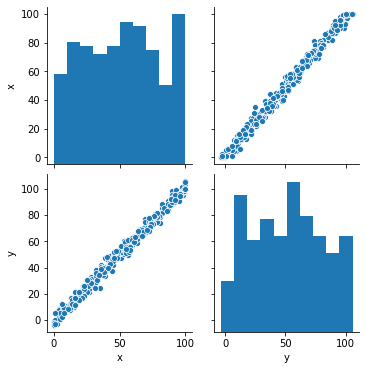

In [89]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [90]:
df.corr()

,x,y
x,1.000000,0.994545
y,0.994545,1.000000


In [91]:
df.cov()

,x,y
x,812.494303,824.141698
y,824.141698,845.150999


b. Train a linear regression model using week-20-class-2 as reference. We'd like to predict column `y`.

Make sure to do the following:
* Separate values into `X` and `Y` variables.

In [92]:
X = df["x"]
Y = df["y"]

* Generate training and test data for `X` and `Y` using `train_test_split` (with a test size of 20%)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

X_train.values.reshape(-1,1) 

array([[ 63],
       [ 29],
       [ 30],
       [ 23],
       [ 16],
       [ 19],
       [ 37],
       [  4],
       [ 69],
       [ 91],
       [ 92],
       [ 52],
       [ 28],
       [ 89],
       [ 54],
       [ 80],
       [ 76],
       [  4],
       [ 95],
       [  0],
       [ 82],
       [ 14],
       [ 67],
       [ 78],
       [  0],
       [ 11],
       [ 36],
       [ 61],
       [ 16],
       [ 53],
       [ 96],
       [ 20],
       [  5],
       [ 46],
       [ 74],
       [ 55],
       [  2],
       [ 41],
       [ 66],
       [ 54],
       [ 45],
       [ 39],
       [ 21],
       [ 27],
       [ 68],
       [ 66],
       [ 42],
       [ 73],
       [ 16],
       [  8],
       [ 27],
       [ 96],
       [ 25],
       [ 15],
       [ 98],
       [ 91],
       [ 28],
       [ 63],
       [ 77],
       [ 72],
       [ 65],
       [  4],
       [ 64],
       [ 50],
       [ 90],
       [ 60],
       [ 33],
       [ 92],
       [ 64],
       [ 79],
       [ 36],
      

In [99]:
y_train.values.reshape(-1,1)

array([[ 58.61466887],
       [ 26.49487961],
       [ 26.48713683],
       [ 24.68362712],
       [ 16.74923937],
       [ 17.09537241],
       [ 40.00709598],
       [  6.07939007],
       [ 70.9146434 ],
       [ 95.06140858],
       [ 89.73153611],
       [ 54.08170635],
       [ 29.31770045],
       [ 89.82634442],
       [ 59.07247174],
       [ 79.44769523],
       [ 78.04237454],
       [  7.64652976],
       [ 97.61793701],
       [ -2.34473854],
       [ 88.54475895],
       [ 12.42624606],
       [ 63.80768172],
       [ 74.4993599 ],
       [ -3.46788379],
       [  8.67333636],
       [ 40.24701716],
       [ 59.225745  ],
       [ 21.16523945],
       [ 50.17008622],
       [ 97.27405461],
       [ 17.85738813],
       [  0.67607675],
       [ 46.56141773],
       [ 72.9138853 ],
       [ 55.7383467 ],
       [ -1.63296825],
       [ 38.68888682],
       [ 67.01715955],
       [ 52.45103628],
       [ 44.68913433],
       [ 38.05766408],
       [ 17.0854783 ],
       [ 21

* Create an instance of the `LinearRegression` class and run the regression.

In [100]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

* Output the score of the regression.

In [103]:
score = reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

print(score)

0.9904072077370212


* Chart the data.

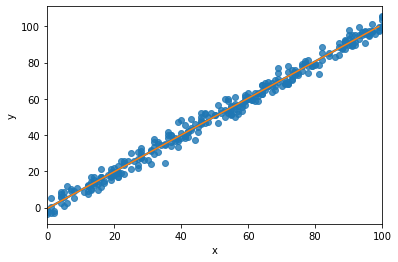

In [104]:
y_line = np.arange(0,100).reshape(-1,1)
sns.regplot(x='x', y='y', data=df, fit_reg=True)
plt.plot(y_line, reg.predict(y_line))
plt.show()

* Bonus: what was the y-intercept and slope? Use the documentation to find this information out.

# Part 3

Using a dataset of your choosing (try kaggle if stuck). Set up and run a linear regression on the data using the steps from Part 2. Don't worry if your results are inconclusive (it happens). Demonstrate that you're able to do it.

In [105]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [107]:
video_games = pd.read_csv("../datasets/vgsales.csv")

video_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [112]:
video_games.shape

(16598, 11)

In [113]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [114]:
video_games[video_games.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [115]:
df = video_games.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


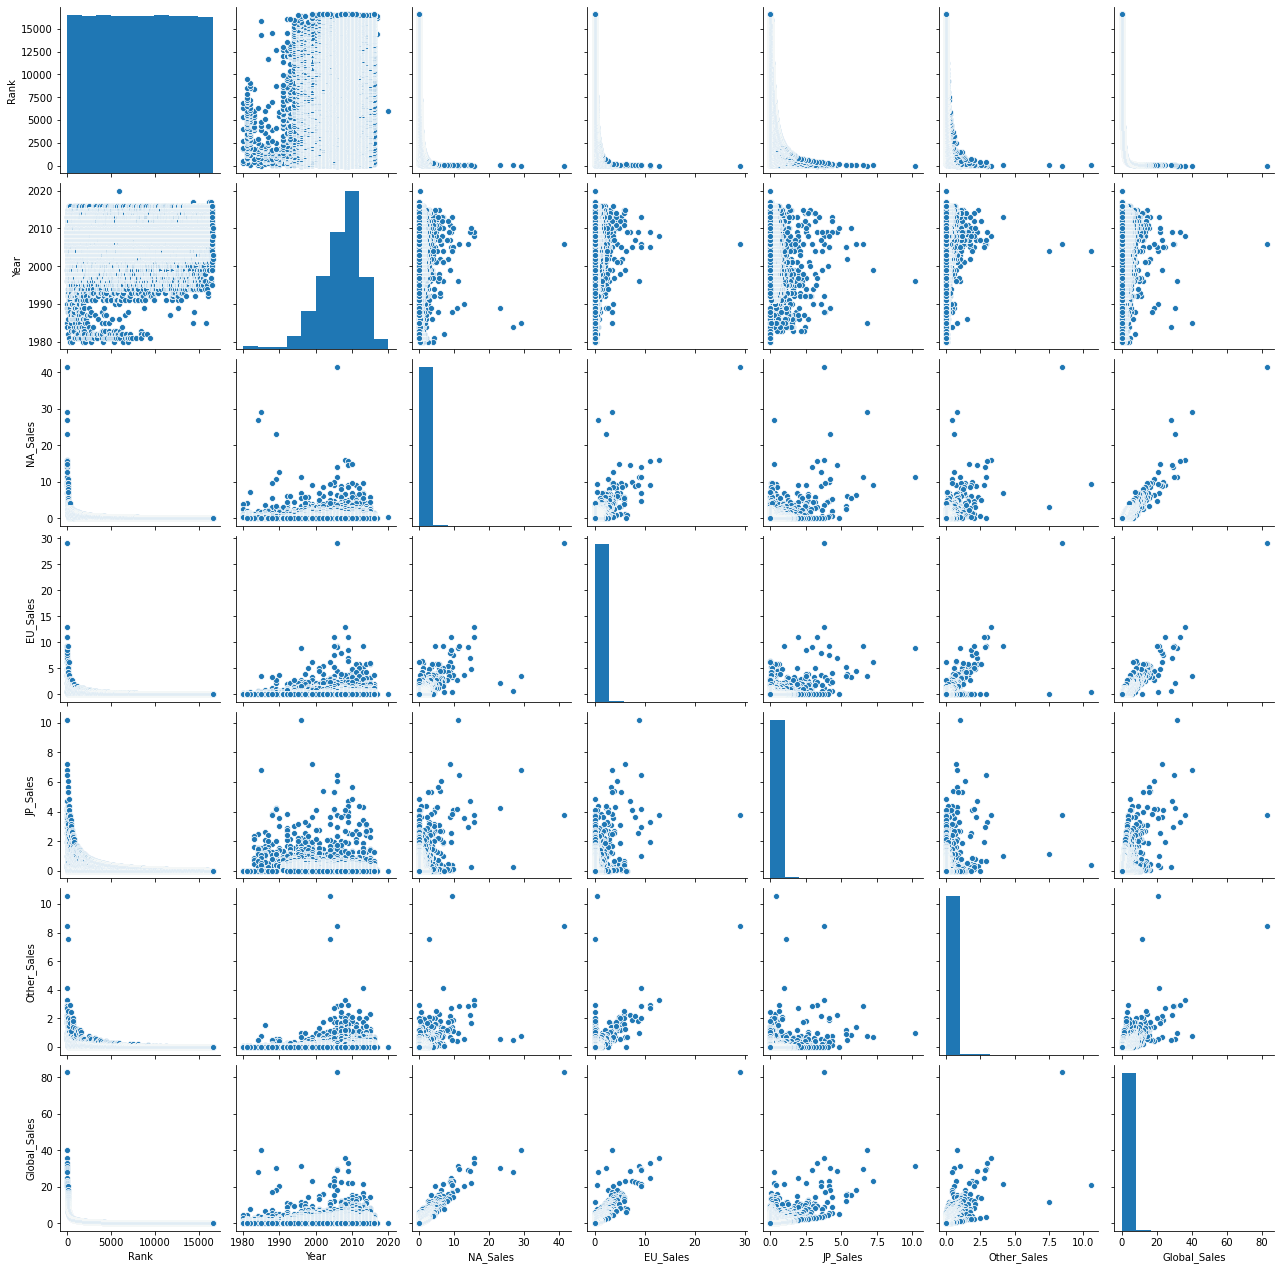

In [117]:
sns.pairplot(df)
plt.show()

In [118]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


In [119]:
df.cov()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,2.296954e+07,4976.349611,-1577.896037,-925.441621,-402.564992,-303.121864,-3207.324490
Year,4.976350e+03,34.017032,-0.437872,0.018144,-0.308116,0.045597,-0.682377
NA_Sales,-1.577896e+03,-0.437872,0.676395,0.322077,0.115754,0.099194,1.213328
EU_Sales,-9.254416e+02,0.018144,0.322077,0.259389,0.069315,0.070309,0.721033
JP_Sales,-4.025650e+02,-0.308116,0.115754,0.069315,0.097269,0.017225,0.299538
Other_Sales,-3.031219e+02,0.045597,0.099194,0.070309,0.017225,0.036131,0.222837
Global_Sales,-3.207324e+03,-0.682377,1.213328,0.721033,0.299538,0.222837,2.456569


In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df["Genre"].values, y=df["Global_Sales"].values, height=10)
plt.ylabel("Global_Sales")
plt.xlabel("Genre")
plt.show()

In [ ]:
X = df["Genre"]
Y = df["Global_Sales"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

In [121]:
score_df = reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

In [122]:
print(score_df)

0.9904072077370212
